# O que vende um carro?

Segue aqui um projeto de EDA, Análise exploratória de dados (Exploratory data analysis), da Lista de Eixo de Manivela. Centenas de propagandas gratuitas de veículos são publicadas no site todos os dias. É necessário estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.

## Iniciação

- Carregando pandas para o manejo do banco de dados
- Matplotlib para desfrutar da vizualização gráfica dos dados
- Statistics para cálculos de estatística
- Datetime para formatação das datas na coluna referente ao dia no calendário
- Seaborn como complemento ao matplotlib

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import matplotlib as plot
import statistics
import datetime as dt
from scipy.stats import chisquare
import matplotlib.pyplot as plt
import seaborn as sns

### Carregando dados

Carregando o dataframe.

In [2]:
# Carregando o arquivo com os dados em um DataFrame
df=pd.read_csv(r'C:\Users\gabri\OneDrive\vehicles_us.csv')

### Explorando os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada


In [3]:
# Imprimindo  as informações gerais/resumidas sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# Imprimindo uma amostragem dos dados
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [5]:
#Imprimindo forma do dataframe.
df.shape

(51525, 13)

In [6]:
#Imprimindo dados gerais do dataframe.
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


Há valores ausentes em model_year, is4wd, odometer e cylinders.
Como são muitos, serão analisados e preenchidos da forma apropriada.

### Valores ausentes do ano do modelo do carro, odômetro, cor e o sistema de tração do motor devem ser analisados atentamente.

Algumas colunas estão com o tipo de dado incorreto, serão analisadas e corrigidas:
- Model Year
- Condition
- Cylinders
- Is 4wd
- Date Posted

### O tipo de valor da coluna 'is_4wd' deveria ser booleano, 'model_year' deveria ser inteiro, cilindros deveria ter o tipo inteiro, 'date_posted' e 'days_listed' deveriam ter o valor date.

Os dados ausentes de is_4wd se devem provavelmente ao uso de zero com um tipo de dado incorreto, ao tentar simbolizar falso o dataframe o aceitou como nulo. Os outros dados vazios podem ter sido deixados vazios quando colocados no site.

### É provável que os valores ausentes da coluna 'is_4wd' devem se referir aos carros sem esse sistema.

### Conclusões e próximos passos

Será realizada a correção dos tipos de dados para assim poderem passar pelo processo de tratamento e preenchimento. Os dados da condição vão ser categorizados em inteiros, para futuramente calcular a correlação dele com outros aspectos da tabela e preencher dados vazios.

### Criando função para categorizar a condição do carro e a partir dela preencher dados ausentes.

In [7]:
print(df['condition'].unique())
#Observando como as condições são descritas.

['good' 'like new' 'fair' 'excellent' 'salvage' 'new']


In [8]:
#Criando a função para passar as linhas do dataframe e alterar o dado da coluna condition.
def condition(row):
    if 'good' in row['condition']:
        return 2
    if 'like new' in row['condition']:
        return 4
    if 'fair' in row['condition']:
        return 1
    if 'excellent' in row['condition']:
        return 3
    if 'new' in row['condition']:
        return 5
    if 'salvage' in row['condition']:
        return 0


In [9]:
#Aplicando a função.
df['condition']=df.apply(condition, axis=1)

In [10]:
#Checando resultados.
print(df['condition'])

0        2
1        2
2        4
3        1
4        3
        ..
51520    4
51521    0
51522    3
51523    2
51524    2
Name: condition, Length: 51525, dtype: int64


In [11]:
#Checando se o tipo do dado está correto agora.
df['condition'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51525 entries, 0 to 51524
Series name: condition
Non-Null Count  Dtype
--------------  -----
51525 non-null  int64
dtypes: int64(1)
memory usage: 402.7 KB


## Cuidando dos valores ausentes do ano do modelo.

Checando a correlação dos dados para preencher os valores ausentes.

In [12]:
df.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.221518,0.296627,-0.420299,NaN,-0.000682
model_year,0.428656,1.000000,0.282421,-0.148040,-0.473948,NaN,-0.005703
condition,0.221518,0.282421,1.000000,-0.063553,-0.296445,NaN,-0.002404
cylinders,0.296627,-0.148040,-0.063553,1.000000,0.090160,NaN,0.005517
odometer,-0.420299,-0.473948,-0.296445,0.090160,1.000000,NaN,0.003804
is_4wd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days_listed,-0.000682,-0.005703,-0.002404,0.005517,0.003804,NaN,1.000000


Há uma relação significativa entre o ano do modelo e condição do carro, logo usaremos a condição do carro para estimar o ano do modelo.

In [13]:
#Criando função recebendo as linhas do dataframe, calculando/retornando a mediana do ano do modelo pela condição do carro.
def model_year(row):
    if pd.isna(row['model_year']):
        if row['condition']==0:
            return df['model_year'].loc[df['condition']==0].median()
        if row['condition']==1:
             return df['model_year'].loc[df['condition']==1].median()
        if row['condition']==2:
             return df['model_year'].loc[df['condition']==2].median()
        if row['condition']==3:
             return df['model_year'].loc[df['condition']==3].median()
        if row['condition']==4:
             return df['model_year'].loc[df['condition']==4].median()
        if row['condition']==5:
             return df['model_year'].loc[df['condition']==5].median()
    return row['model_year']

In [14]:
#Aplicando a função.
df['model_year']=df.apply(model_year, axis=1)

In [15]:
#Checando resultados.
df.model_year.count()

51525

## Cuidando dos valores ausentes do odômetro.

Dividindo a porcetagem do ano dos modelos para utilizar a mediana de uma faixa de anos para preencher os valores vazios do odômetro, já que com a função corr pode-se concluir que os dados tem uma correlação forte.

In [16]:
#Utilizando corr para conferir se os parâmetros são válidos.
df['odometer'].corr(df['model_year'])

-0.4622959689601153

In [17]:
#Dividindo em grupos.
df['model_year'].describe(percentiles=[.16, .32, .50, .68, .84])

count    51525.000000
mean      2009.816419
std          6.091605
min       1908.000000
16%       2004.000000
32%       2008.000000
50%       2011.000000
68%       2013.000000
84%       2015.000000
max       2019.000000
Name: model_year, dtype: float64

In [18]:
#Criando função para preencher.
def odometer(row):
    if pd.isna(row['odometer']):
        if row['model_year']<=2004:
            return df['odometer'].loc[df['model_year']<2004].median()
        elif row['model_year']<2008:
            return df['odometer'].loc[df['model_year']<2008].median()
        elif row['model_year']<2011:
            return df['odometer'].loc[df['model_year']<2011].median()
        elif row['model_year']<2013:
            return df['odometer'].loc[df['model_year']<2013].median()
        elif row['model_year']<2015:
            return df['odometer'].loc[df['model_year']<2015].median()
        elif row['model_year']<=2019:
            return df['odometer'].loc[df['model_year']<2019].median()
    return row['odometer']

In [19]:
#Aplicando função.
df['odometer']=df.apply(odometer, axis=1)

In [20]:
#Checando se foram preenchidos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  int64  
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 5.1+ MB


## Cuidando dos valores ausentes dos cilindros.

Preenchendo com o número de cilindros do modelo do carro.

In [21]:
#Criando função.
def cylinders(row):
    if pd.isna(row['cylinders']):
        try:
            return statistics.mode(df['cylinders'].loc[(df['model']==row['model']) & df['model_year']==row['model_year']])
        except:
            return statistics.mode(df['cylinders'].loc[(df['model']==row['model'])])
    return row['cylinders']

In [22]:
#Aplicando função.
df['cylinders']=df.apply(cylinders, axis=1)

In [23]:
#Checando resultados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  int64  
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 5.1+ MB


## Cuidando dos valores ausentes da cor da pintura dos carros.

Preenchendo com valor "unknow".

In [24]:
#Usando fillna para preencher valores ausentes.
df['paint_color']=df['paint_color'].fillna('unknown')

In [25]:
#Checando resultados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  int64  
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 5.1+ MB


## Cuidando dos valores ausentes da coluna 'is_4wd'.

Transformando em valores booleanos e definindo os ausentes como falsos.

In [26]:
#Definindo 1 como True (boolean).
(df.loc[(df['is_4wd']==1), 'is_4wd'])=True

In [27]:
#Definindo ausentes como False (boolean).
df['is_4wd']=df['is_4wd'].fillna(False)

In [28]:
#Checando resultados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  int64  
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 4.8+ MB


## Corrija outros tipos de dados

Corrigindo tipos de outros dados os quais estavam em float para inteiros.

In [29]:
df['model_year']=df['model_year'].astype(int)

In [30]:
df['cylinders']=df['cylinders'].astype(int)

In [31]:
df['date_posted'].head()

0    2018-06-23
1    2018-10-19
2    2019-02-07
3    2019-03-22
4    2019-04-02
Name: date_posted, dtype: object

In [32]:
df['days_listed'].head()

0    19
1    50
2    79
3     9
4    28
Name: days_listed, dtype: int64

In [33]:
#Transformando valor da coluna no tipo data.
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int32(2), int64(3), object(5)
memory usage: 4.4+ MB


## Enriqueça os dados

[Adicione fatores adicionais aos dados para tornar a análise mas fácil.]

In [35]:
# Adicionando valores data/hora para quando a propaganda estiver colocada.
df['day_posted']=df['date_posted'].dt.weekday


In [36]:
# Adicionando a idade do veículo quando a propaganda for colocada.
df['age_posted']=df['date_posted'].dt.year-df['model_year']



In [37]:
# Adicione a quilometragem média por ano. 
df['km_by_year']=df['odometer']/df['age_posted']

In [38]:
#Analisando valores.
df['km_by_year'].value_counts()

inf             2133
1.960800e+04     618
2.580000e+04     601
1.622222e+04     563
2.287600e+04     517
                ... 
5.226667e+03       1
1.302250e+04       1
1.019700e+04       1
2.131270e+04       1
2.791460e+04       1
Name: km_by_year, Length: 22671, dtype: int64

In [39]:
#Função para corrigir os valores de quilometragem.
def km_by_year(row):
    if row['age_posted']==0:
        return row['odometer']
    return row['km_by_year']

In [40]:
#Aplicando função.
df['km_by_year']=df.apply(km_by_year, axis=1)

## Verifique os dados limpos

In [41]:
#Verificando os dados novamente.
df.describe()

,price,model_year,condition,cylinders,odometer,days_listed,day_posted,age_posted,km_by_year
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.816419,2.637535,6.121494,119150.125590,39.55476,3.005434,8.491043,19558.931788
std,10040.803015,6.091605,0.712447,1.657296,60873.825201,28.20427,1.997759,6.105618,16886.099443
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,79181.000000,19.00000,1.000000,4.000000,10933.333333
50%,9000.000000,2011.000000,3.000000,6.000000,121107.000000,33.00000,3.000000,7.000000,15500.000000
75%,16839.000000,2014.000000,3.000000,8.000000,155015.000000,53.00000,5.000000,12.000000,22727.272727
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.00000,6.000000,110.000000,373200.000000


In [42]:
#Checando outliers.
df[df['price']==1]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,age_posted,km_by_year
405,1,2014,chevrolet camaro,3,6,gas,71310.0,automatic,coupe,unknown,False,2018-07-14,29,5,4,17827.500000
3063,1,1998,chevrolet silverado,2,8,gas,164000.0,automatic,pickup,unknown,True,2018-10-11,49,3,20,8200.000000
3808,1,2007,chevrolet tahoe,2,8,gas,200.0,automatic,SUV,red,False,2019-03-18,63,0,12,16.666667
3902,1,1996,ford f-150,1,8,gas,163000.0,manual,truck,white,False,2019-02-23,54,5,23,7086.956522
4140,1,2004,chevrolet silverado,3,8,diesel,83000.0,automatic,pickup,unknown,True,2019-02-04,14,0,15,5533.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49699,1,2007,chevrolet trailblazer,3,8,gas,155015.0,automatic,SUV,black,True,2018-08-06,28,0,11,14092.272727
49709,1,2012,ford f150,3,8,gas,139700.0,other,pickup,red,True,2019-03-11,18,0,7,19957.142857
50245,1,1986,chevrolet silverado,2,8,gas,164000.0,automatic,truck,red,True,2018-11-30,50,4,32,5125.000000
50393,1,2003,gmc sierra 2500hd,2,8,diesel,212300.0,automatic,pickup,black,True,2019-04-12,28,4,16,13268.750000


In [43]:
#Conferindo relações entre os dados.
df.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,day_posted,age_posted,km_by_year
price,1.000000,0.418347,0.221518,0.300448,-0.401288,0.315145,-0.000682,-0.000343,-0.417029,0.235156
model_year,0.418347,1.000000,0.295711,-0.142399,-0.455931,0.041079,-0.005239,-0.007401,-0.997140,0.462747
condition,0.221518,0.295711,1.000000,-0.065569,-0.282249,0.012856,-0.002404,0.001152,-0.294746,0.119141
cylinders,0.300448,-0.142399,-0.065569,1.000000,0.086652,0.407433,0.003176,-0.003558,0.142043,-0.039216
odometer,-0.401288,-0.455931,-0.282249,0.086652,1.000000,0.031468,0.002581,0.001857,0.454398,0.093608
is_4wd,0.315145,0.041079,0.012856,0.407433,0.031468,1.000000,0.002003,0.003207,-0.041172,0.045073
days_listed,-0.000682,-0.005239,-0.002404,0.003176,0.002581,0.002003,1.000000,0.002734,0.006079,-0.004340
day_posted,-0.000343,-0.007401,0.001152,-0.003558,0.001857,0.003207,0.002734,1.000000,0.006819,-0.000128
age_posted,-0.417029,-0.997140,-0.294746,0.142043,0.454398,-0.041172,0.006079,0.006819,1.000000,-0.469701
km_by_year,0.235156,0.462747,0.119141,-0.039216,0.093608,0.045073,-0.004340,-0.000128,-0.469701,1.000000


In [44]:
#Dividindo porcentagens para agrupar os dados.
df['model_year'].describe(percentiles=[.16, .32, .50, .68, .84])

count    51525.000000
mean      2009.816419
std          6.091605
min       1908.000000
16%       2004.000000
32%       2008.000000
50%       2011.000000
68%       2013.000000
84%       2015.000000
max       2019.000000
Name: model_year, dtype: float64

In [45]:
#Checando outros valores absurdos.
(df[df['odometer']==990000])

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,age_posted,km_by_year
17869,59900,1964,chevrolet corvette,4,8,gas,990000.0,automatic,convertible,red,False,2018-06-17,28,6,54,18333.333333
40729,4700,2013,chevrolet cruze,2,6,gas,990000.0,automatic,sedan,black,False,2018-05-02,4,2,5,198000.000000


## Estude os parâmetros fundamentais

Estudando os parâmetros fundamentais.

Os parâmetros são
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

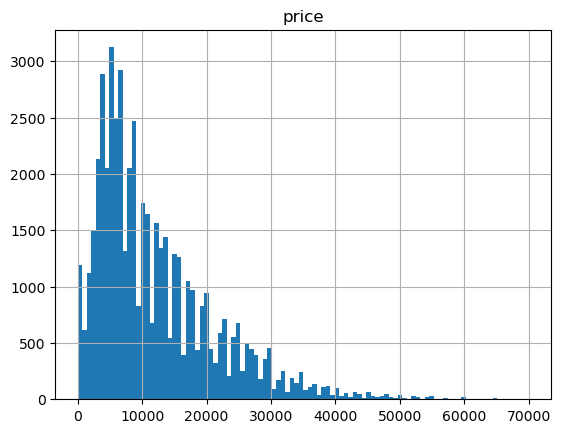

In [46]:
#Observando gráfico de preços dos carros, pode-se concluir que os valores mais frequentes estão entre 0 e 20000.
df.hist('price', bins=100, range=(0, 70000)) 


array([[<AxesSubplot:title={'center':'age_posted'}>]], dtype=object)

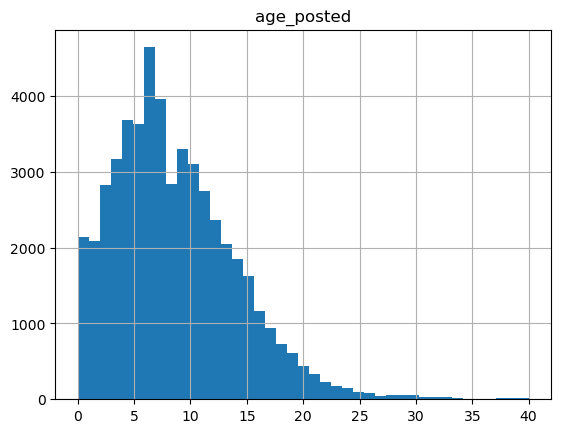

In [47]:
#Observando idade dos carros ofertados e vvizualizando que a moda da idade é 7.
df.hist('age_posted', bins=41, range=(0, 40)) 



array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

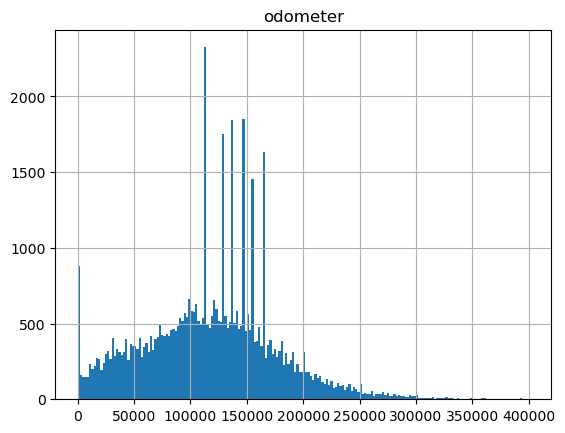

In [48]:
#Checando valor dos odômetros da tabela.
df.hist('odometer', bins=200, range=(0, 400000)) 


array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

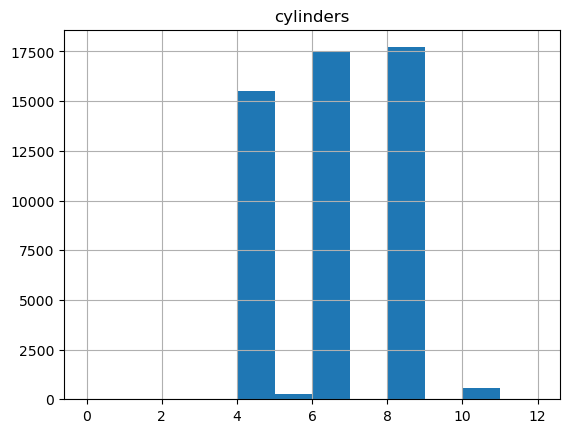

In [49]:
#Observando quantidades de carros com cada tipo de motor.
df.hist('cylinders', bins=12, range=(0, 12)) 



array([[<AxesSubplot:title={'center':'condition'}>]], dtype=object)

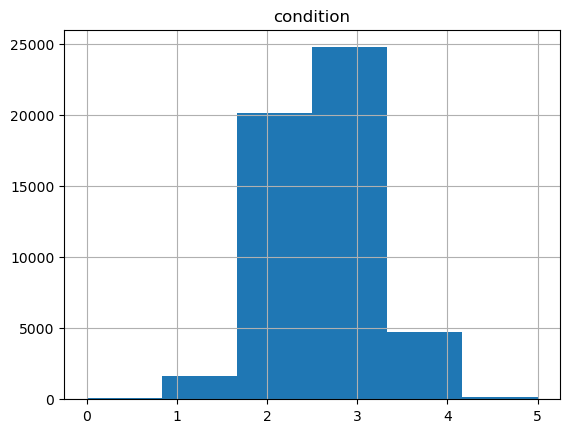

In [50]:
#Verificando a condição dos carros da tabela.
df.hist('condition', bins=6, range=(0, 5)) 



array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

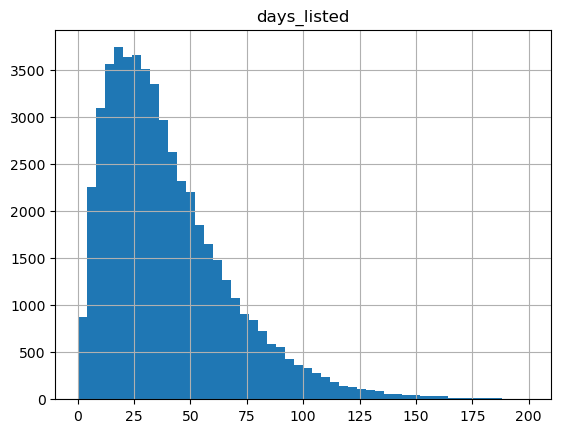

In [51]:
#Observando tempo de propaganda dos carros no site.
df.hist('days_listed', bins=50, range=(0, 200)) 




## Estudando valores suspeitos.

Carros vendidos por um valor menor que 300 terão o preço reavaliado de acordo com o tipo e o modelo.

In [52]:
#Salvando uma tabela dinâmica com a média dos valores de acordo com o tipo e modelo do carro.
median_type_pt=df.pivot_table(index=['type', 'model_year'], values='price', aggfunc='median')

In [53]:
#Definindo a função que vai substituir os valores com a média da tabela sem outliers.
def price(row):
    if row['price']<300:
        return median_type_pt['price'][row['type']][row['model_year']]
    return row['price']   

In [54]:
#Salvando nova tabela para fazer últimos ajustes.
df_final=df

In [55]:
#Aplicando função.
df_final['price']=df.apply(price, axis=1)

# Checando mais valores absurdos.


In [56]:
# Determinando o limite superior para valores atípicos e os apagando.
df_final=df_final.drop((df_final[df_final['km_by_year']>120000].index))

In [57]:
#Resentando index da tabela.
df_final=df_final.reset_index()

In [58]:
# Retirando valores absurdos da tabela odômetro.
df_final=df_final.drop((df_final[df_final['odometer']>350000].index))

In [59]:
# Novamente recuperando os index's.
df_final=df_final.reset_index()

In [60]:
#Retirando carros com mais de 35 anos.
df_final=df_final.drop((df_final[df_final['age_posted']>35].index))

## Estude os parâmetros fundamentais sem valores atípicos

Comparando dados antigos e novos.

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

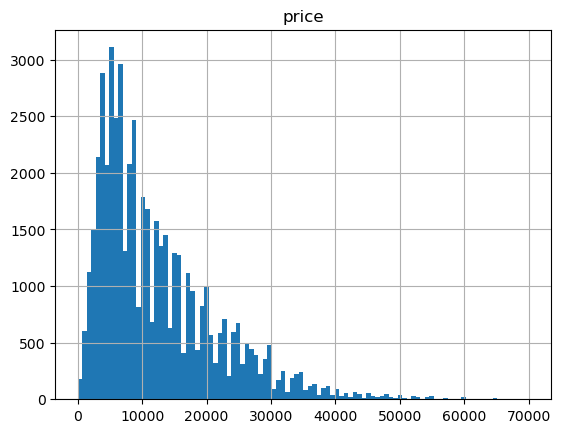

In [61]:
#Gerando histograma do preço.
df_final.hist('price', bins=100,range=(0, 70000)) 


array([[<AxesSubplot:title={'center':'age_posted'}>]], dtype=object)

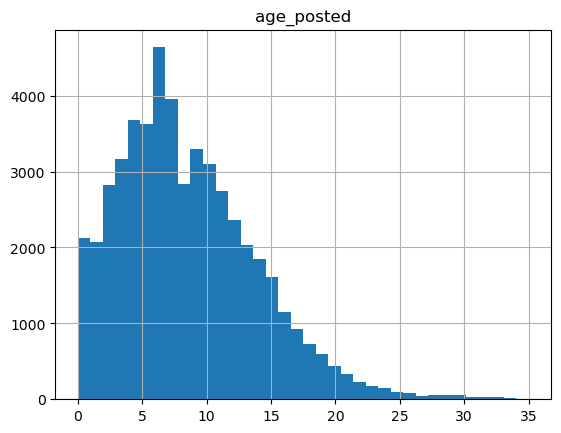

In [62]:
#Gerando histograma da idade do carro.
df_final.hist('age_posted', bins=36, range=(0, 35)) 

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

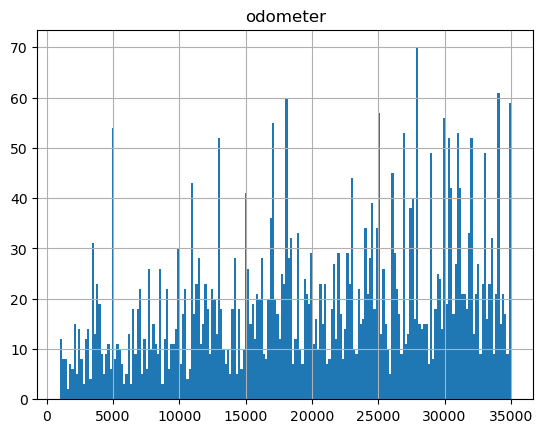

In [63]:
#Gerando histograma do odômetro do carro.
df_final.hist('odometer', bins=200, range=(1000, 35000)) 

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

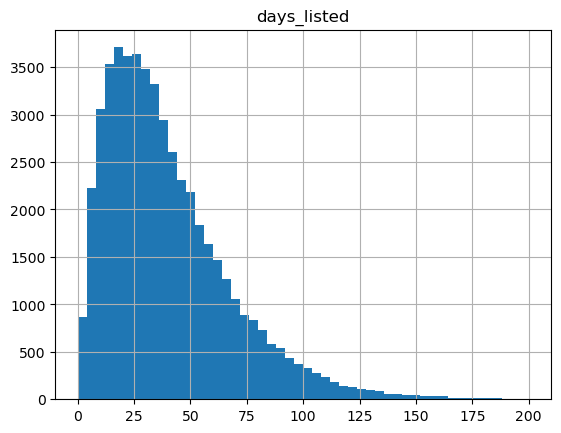

In [64]:
#Gerando histograma da quantidade de dias de propaganda.
df_final.hist('days_listed', bins=50, range=(0, 200)) 

## Tempo de vida das propagandas

[Estude quantos dias propagandas foram exibidas (`days_listed`). Calcule a média e a mediana. Descreva o tempo de vida útil comum de uma propaganda. Determine quando as propagandas foram removidas rapidamente, e quando elas foram listadas por um tempo anormalmente longo.]
As propagandas duram em média de 40 dias, os menores retiram a propaganda após 19 dias, e os maiores ultrapassam 53 e podem chegar a ser 271 dias.

In [65]:
df_final['days_listed'].describe()

count    51169.000000
mean        39.552346
std         28.202775
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [66]:
#Calculando valor médio do dataframe.
df_final['days_listed'].median()

33.0

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

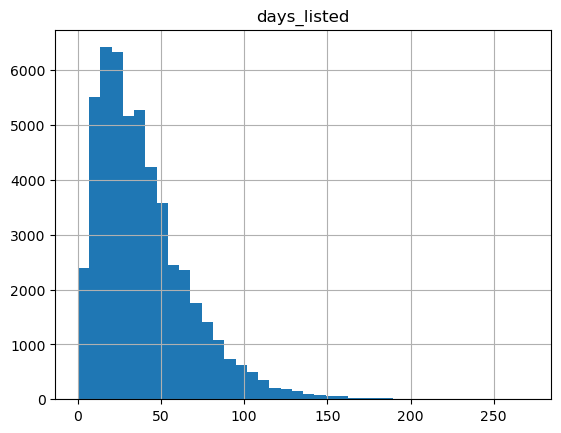

In [67]:
#Analisando o histograma das propagandas observa-se que elas geralmente duram até 50 dias.
df_final.hist('days_listed',bins=40)

In [68]:
df_final.corr()
#Verificando correlação dos dados corrigidos.

,level_0,index,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,day_posted,age_posted,km_by_year
level_0,1.000000,1.000000,-0.023439,-0.028555,-0.005251,-0.002868,0.031750,-0.001955,0.007812,-0.003127,0.028533,-0.008281
index,1.000000,1.000000,-0.023440,-0.028553,-0.005250,-0.002868,0.031748,-0.001958,0.007812,-0.003127,0.028531,-0.008279
price,-0.023439,-0.023440,1.000000,0.530674,0.240847,0.332013,-0.458849,0.344006,-0.002872,0.001396,-0.528943,0.267694
model_year,-0.028555,-0.028553,0.530674,1.000000,0.321771,-0.127507,-0.542775,0.018453,-0.003544,-0.000623,-0.996486,0.493889
condition,-0.005251,-0.005250,0.240847,0.321771,1.000000,-0.064289,-0.291888,0.012403,-0.002663,0.001380,-0.320581,0.121457
cylinders,-0.002868,-0.002868,0.332013,-0.127507,-0.064289,1.000000,0.089723,0.413070,0.002939,-0.004934,0.127119,-0.036082
odometer,0.031750,0.031748,-0.458849,-0.542775,-0.291888,0.089723,1.000000,0.031381,0.004453,0.001011,0.540838,0.055335
is_4wd,-0.001955,-0.001958,0.344006,0.018453,0.012403,0.413070,0.031381,1.000000,0.002493,0.004107,-0.018557,0.041501
days_listed,0.007812,0.007812,-0.002872,-0.003544,-0.002663,0.002939,0.004453,0.002493,1.000000,0.002644,0.004445,-0.002114
day_posted,-0.003127,-0.003127,0.001396,-0.000623,0.001380,-0.004934,0.001011,0.004107,0.002644,1.000000,-0.000018,0.001426


## Média de preços por cada tipo de veículo

Analisando o número de propagandas e o preço médio para cada tipo de veículo.

In [69]:
#Os dois principais são SUV e truck.
df_final['type'].value_counts()

SUV            12379
truck          12285
sedan          12125
pickup          6932
coupe           2176
wagon           1539
mini-van        1159
hatchback       1043
van              630
convertible      413
other            252
offroad          212
bus               24
Name: type, dtype: int64

In [70]:
#Construindo uma tabela dinâmica com a mediana dos preços a partir do tipo de carro.
df_final.pivot_table(index='type', values='price', aggfunc='median')

,price
type,
SUV,8995.0
bus,10500.0
convertible,11900.0
coupe,13990.0
hatchback,5997.0
mini-van,6500.0
offroad,11800.0
other,8995.0
pickup,14500.0


<AxesSubplot:>

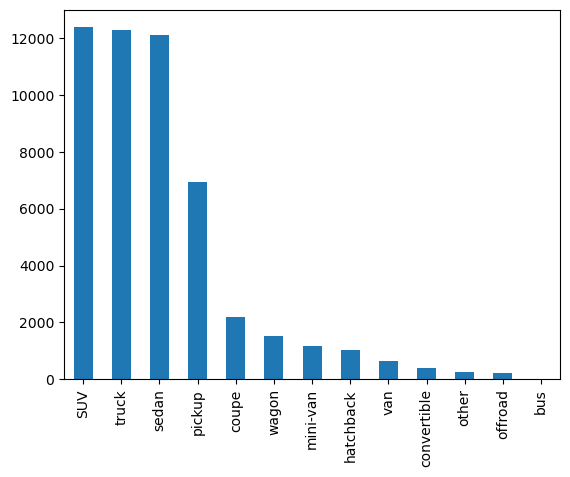

In [71]:
#Imprimindo gráfico de barras.
df_final['type'].value_counts().plot.bar()

## Fatores de preço

Construindo gráficos para entender quais fatores impactam mais o preço, dentro dos parâmetros da idade, quilometragem, condição, tipo de transmissão e cor. Para as variáveis categóricas foram usados gráficos de caixa, e para o restante gráficos de dispersão.

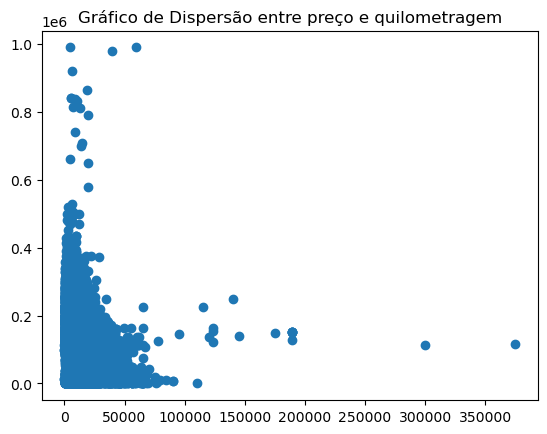

In [72]:
plt.scatter(df['price'], df['odometer'])
plt.title('Gráfico de Dispersão entre preço e quilometragem')
plt.show()
#Utilizando gráfico de Dispersão entre preço e quilometragem.

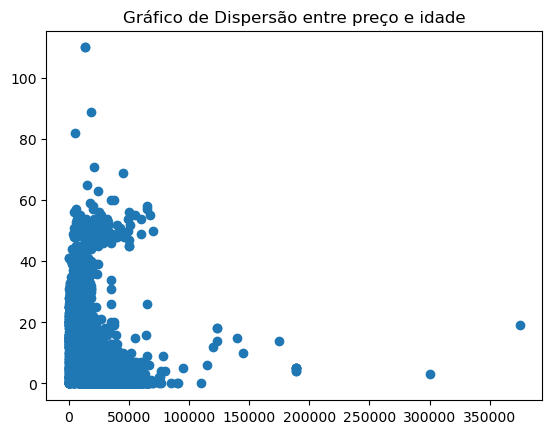

In [73]:
plt.scatter(df['price'], df['age_posted'])
plt.title('Gráfico de Dispersão entre preço e idade')
plt.show()
#Utilizando gráfico de Dispersão entre preço e idade.

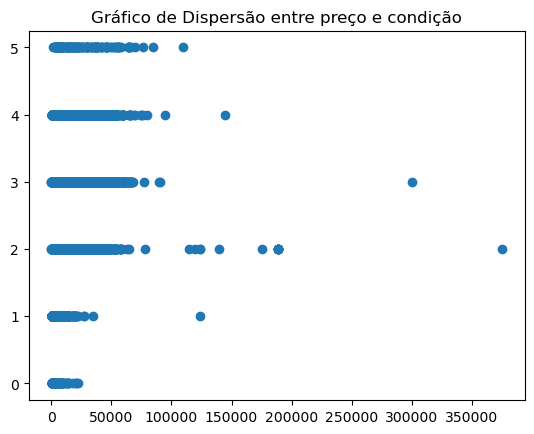

In [74]:
plt.scatter(df['price'], df['condition'])
plt.title('Gráfico de Dispersão entre preço e condição')
plt.show()
#Utilizando gráfico de Dispersão entre preço e condição.

(0.0, 50000.0)

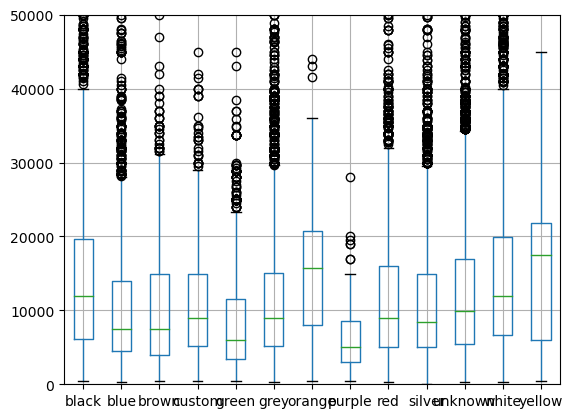

In [75]:
color_pivot= df_final.pivot_table(index='level_0', columns='paint_color', values='price', aggfunc='mean')
color_pivot.boxplot()
plt.ylim(0,50000)
#Utilizando gráfico de caixa entre cores e quantidade.

In [76]:
#Contando quantas cores, para saber se o gráfico é fidedigno.
color_pivot.count()

paint_color
black      7664
blue       4432
brown      1206
custom     1137
green      1379
grey       5030
orange      222
purple      101
red        4375
silver     6215
unknown    9203
white      9966
yellow      239
dtype: int64

(0.0, 50000.0)

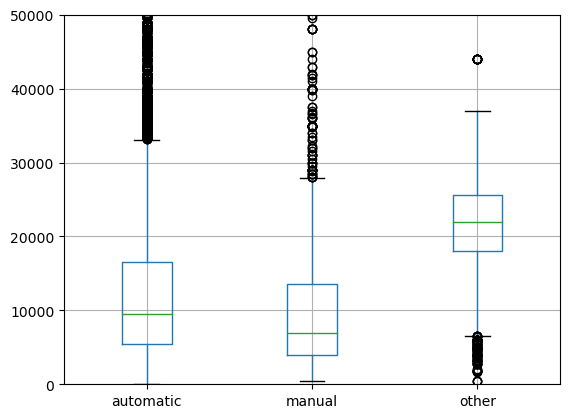

In [77]:
transmission_pivot= df_final.pivot_table(index='level_0', columns='transmission', values='price', aggfunc='mean')
transmission_pivot.boxplot()
plt.ylim(0,50000)
#Gráfico de caixa para distribuição de tipos de transmissão.

In [78]:
transmission_pivot.count()
#Contagem para saber se os gráficos são fidedignos.

transmission
automatic    46614
manual        2764
other         1791
dtype: int64

In [79]:
#Observando os dados uma última vez.
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51169 entries, 0 to 51392
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   level_0       51169 non-null  int64         
 1   index         51169 non-null  int64         
 2   price         51169 non-null  float64       
 3   model_year    51169 non-null  int32         
 4   model         51169 non-null  object        
 5   condition     51169 non-null  int64         
 6   cylinders     51169 non-null  int32         
 7   fuel          51169 non-null  object        
 8   odometer      51169 non-null  float64       
 9   transmission  51169 non-null  object        
 10  type          51169 non-null  object        
 11  paint_color   51169 non-null  object        
 12  is_4wd        51169 non-null  bool          
 13  date_posted   51169 non-null  datetime64[ns]
 14  days_listed   51169 non-null  int64         
 15  day_posted    51169 non-null  int64 

# Conclusão geral


## Tratamento de dados

### Identificando e Estudando os valores ausentes

#### Os valores ausentes foram analisados e essas foram as conclusões para cada coluna:

- Para model_year foram estimadas as linhas ausentes utilizando a condição do carro, pois possuem correlação forte.
- Para cylinders foi utilizado a comparação com o mesmo modelo do carro, do mesmo ano no dataframe, e nos casos onde não haviam, foram utilizados apenas o modelo do carro.
- Para odometer a relação mais próxima era com a coluna model_year, então foi calculada de acordo com a faixa de idade do modelo do carro.
- Em paint_color os valores ausentes foram preenchidos com 'unknow', pois não haveria como saber a cor do veículo.
- Em is_4wd os valores foram transformados em booleanos.

### Corrigindo outros tipos de dados

#### Algumas colunas estavam com o tipo de dado incorreto:

- model_year foi transferido de float para int.
- cylinders foi transferido de float para int.
- date_posted foi transferido de object para datetime.

## Enriquecendo os dados

### Criando colunas para facilitar a análise dos dados

#### Adequando em cálculos e formatando os dados para novas colunas:

- day_posted é o dia da semana em que a propaganda foi postada, extraído da coluna de 'date_posted'.
- age_posted é a idade do carro quando a propaganda foi postada, calculada com a diferença do ano da propaganda e o ano do modelo do carro.
- km_by_year é a quilometragem do carro por ano e foi calculada pela divisão do odômetro e idade do carro, posteriormente recebeu correção de quando o carro não possuia um ano ainda, pois gerava resultado infinito e mudou para a quilometragem percorrida pelo carro no ano.

## Verificando os dados limpos

### Analisando colunas com valores absurdos

#### Corrigindo valores altos ou baixos de mais:

- Em price existem 798 linhas de carros com preço igual a 1, o que é inacreditável para o valor de um automóvel, outros valores minúsculos também são encontrados. Então, são corrigidos com base no tipo e ano do modelo do carro, os quais possuem forte correlação com o valor do automóvel.

- No odômetro são encontrado valores que nenhum carro suportaria percorrer, então é substituída pela mediana de quilometragem de uma faixa da idade do modelo do carro, pois é descrito na função .corr() que possuem forte correlação.

- Em cylinders foram utilizados os modelos de carro e seus respectivos anos para completar os dados faltantes.

## Estudando os parâmetros fundamentais do dataframe

### Entendendo como os dados das propagandas se relacionam e quais conclusões podem-se tirar disso

#### Utilizando as tabelas para associar visualmente a relação entre os dados, gerando conclusões:

- SUV, TRUCK, sedan tem o maior número de propagandas.
- Utilizando o gráfico de dispersão com os parâmetros de velocidade e preço, é deduzível que os maiores preços se concentram em carros com quilometragem baixa, e carros com quilometragem alta tendem a ter o preço menor.
- O mesmo acontece com a idade do carro, quanto mais novo, maior seu preço.
- Sobre a condição, é notável pelo gráfico de dispersão criado que carros com condição ruim tem o preço bem mais reduzido.
- Quando se avaliam as cores, é perceptível que a mediana de preço dos carros na cor amarela é elevada, e os carros laranjas tendem a serem mais caros também.
- Quanto a transmissão, os automáticos são ligeramente mais caros que os manuais, e os carros com a classificação outros, são bem maiores, por serem CVT ou câmbio automático de duas embreagens.
- Todos os dados utilizados para fazer o estudo do caso possuiam uma contagem maior que 50 para manter os cálculos fidedignos ao campo amostral.